# **Import The Libraries and Packages**

In [ ]:
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [ ]:
!pip3 install snscrape
!pip install guess-language
!pip install guess_language-spirit

# **Extract and Analyze the Data**

In [ ]:
querySearch = input("Enter the query: ")
since = input("Enter the start date: ")
until = input("Enter the end date: ")

Enter the query: coronavirus
Enter the start date: 2021-01-01
Enter the end date: 2021-02-02


In [ ]:
import snscrape.modules.twitter as sntwitter

# Creating list to append tweet data to
t_list = []

# Using TwitterSearchScraper to scrape data and append tweets to list
for i,tweet in enumerate(sntwitter.TwitterSearchScraper(f'{querySearch} since:{since} until:{until}').get_items()):
    if i>500:
        break
    t_list.append([tweet.content])
  
text = t_list


**Extract the tweets of a Twitter user. First, get the last 100 posts for the Twitter user and show only the five most recent tweets**

In [ ]:
""" # Extract 100 tweets from the twitter user
posts = api.user_timeline(screen_name="", count = 79, lang ="en", tweet_mode="extended")

#  Print the last 5 tweets
print("Show the 5 recent tweets:\n")
i=1
for tweet in posts[:5]:
    print(str(i) +') '+ tweet.full_text + '\n')
    i= i+1 """

**Create a DataFrame with a column called Tweets that’ll contain the posts from the Twitter user, and then show the first five rows**

In [ ]:
# Create a dataframe with a column called Tweets
df = pd.DataFrame(t_list, columns=['Text'])
# Show the first 5 rows of data
df.head()

,Text
0,Oh and during the entire course of all three s...
1,"Cafiero ""Ya llevamos 370 mil vacunas aplicadas..."
2,@RTLWEST Das #Coronavirus für das der #Impfsto...
3,Coronavirus Argentina - Nuevos casos diarios c...
4,Olivia Newton-John dice que no recibirá la vac...


**The data is a little dirty because it contains the @ symbol, hyperlinks, RTs, and may contain hash tags, so I’ll clean it up by creating a function to remove these symbols from the tweets. Then, apply that function to the tweets and show the results**

In [ ]:
# Create a function to clean the tweets
def cleanTxt(text):
 text = re.sub('@[A-Za-z0–9]+', '', text) #Removing @mentions
 text = re.sub('#', '', text) # Removing '#' hash tag
 text = re.sub('RT[\s]+', '', text) # Removing RT
 text = re.sub('https?:\/\/\S+', '', text) # Removing hyperlink
 
 return text


# Clean the tweets
df['Text'] = df['Text'].apply(cleanTxt)

# Show the cleaned tweets
df

,Text
0,Oh and during the entire course of all three s...
1,"Cafiero ""Ya llevamos 370 mil vacunas aplicadas..."
2,Das Coronavirus für das der Impfstoff entwick...
3,Coronavirus Argentina - Nuevos casos diarios c...
4,Olivia Newton-John dice que no recibirá la vac...
...,...
496,The only people who deserve stimulus checks ar...
497,porro Bassetti VaccinoAntiCovid primule Covid_...
498,Wishes for 2021🤩\n\n1. Snow (Now) ❄️\n2. Succe...
499,"Coronavirus : ""En vaccinant les plus âgés, on ..."


**We need to add the tweets’ subjectivity and polarity to the DataFrame. In order to do this, We have to create two functions: one to get the tweets called Subjectivity (how subjective or opinionated the text is — a score of 0 is fact, and a score of +1 is very much an opinion) and the other to get the tweets called Polarity (how positive or negative the text is, — score of -1 is the highest negative score, and a score of +1 is the highest positive score).
Next, store the results into two columns — one called Subjectivity and the other called Polarity — and show the results.**

In [ ]:
# Create a function to get the subjectivity
def getSubjectivity(text):
   return TextBlob(text).sentiment.subjectivity

# Create a function to get the polarity
def getPolarity(text):
   return  TextBlob(text).sentiment.polarity


# Create two new columns 'Subjectivity' & 'Polarity'
df['Subjectivity'] = df['Text'].apply(getSubjectivity)
df['Polarity'] = df['Text'].apply(getPolarity)

# Show the new dataframe with columns 'Subjectivity' & 'Polarity'
df

,Text,Subjectivity,Polarity
0,Oh and during the entire course of all three s...,0.55119,0.142857
1,"Cafiero ""Ya llevamos 370 mil vacunas aplicadas...",0.00000,0.000000
2,Das Coronavirus für das der Impfstoff entwick...,0.00000,0.000000
3,Coronavirus Argentina - Nuevos casos diarios c...,0.00000,0.000000
4,Olivia Newton-John dice que no recibirá la vac...,0.00000,0.000000
...,...,...,...
496,The only people who deserve stimulus checks ar...,1.00000,0.000000
497,porro Bassetti VaccinoAntiCovid primule Covid_...,0.00000,0.000000
498,Wishes for 2021🤩\n\n1. Snow (Now) ❄️\n2. Succe...,0.46250,0.062500
499,"Coronavirus : ""En vaccinant les plus âgés, on ...",0.00000,0.000000


**Visualizing all the words in the data using the word-cloud plot to see how well the sentiments are distributed. It looks like the word “health” appears a lot in Bill Gates past 100 tweets**

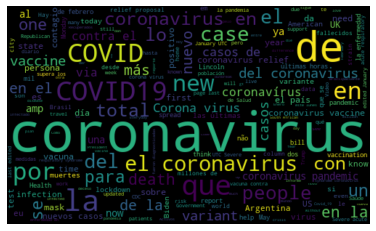

In [ ]:
# word cloud visualization
allWords = ' '.join([twts for twts in df['Text']])
wordCloud = WordCloud(width=500, height=300, random_state=21, max_font_size=110).generate(allWords)
 
 
plt.imshow(wordCloud, interpolation="bilinear")
plt.axis('off')
plt.show()

**Create a function to compute the negative (-1), neutral (0), and positive (+1) analysis, and add the information to a new column called Analysis. Then, show the results.**

In [ ]:
# Create a function to compute negative (-1), neutral (0) and positive (+1) analysis
def getAnalysis(score):
    if score < 0:
      return 'Negative'
    elif score == 0:
      return 'Neutral'
    else:
      return 'Positive'
df['Analysis'] = df['Polarity'].apply(getAnalysis)
# Show the dataframe
df

,Text,Subjectivity,Polarity,Analysis
0,Oh and during the entire course of all three s...,0.55119,0.142857,Positive
1,"Cafiero ""Ya llevamos 370 mil vacunas aplicadas...",0.00000,0.000000,Neutral
2,Das Coronavirus für das der Impfstoff entwick...,0.00000,0.000000,Neutral
3,Coronavirus Argentina - Nuevos casos diarios c...,0.00000,0.000000,Neutral
4,Olivia Newton-John dice que no recibirá la vac...,0.00000,0.000000,Neutral
...,...,...,...,...
496,The only people who deserve stimulus checks ar...,1.00000,0.000000,Neutral
497,porro Bassetti VaccinoAntiCovid primule Covid_...,0.00000,0.000000,Neutral
498,Wishes for 2021🤩\n\n1. Snow (Now) ❄️\n2. Succe...,0.46250,0.062500,Positive
499,"Coronavirus : ""En vaccinant les plus âgés, on ...",0.00000,0.000000,Neutral


**Print the positive tweets in ascending order. The most positive tweet is the #1 tweet**

In [ ]:
# Printing positive tweets 
print('Printing positive tweets:\n')
j=1
sortedDF = df.sort_values(by=['Polarity']) #Sort the tweets
for i in range(0, sortedDF.shape[0] ):
  if( sortedDF['Analysis'][i] == 'Positive'):
    print(str(j) + ') '+ sortedDF['Text'][i])
    print()
    j= j+1

Printing positive tweets:

1) Oh and during the entire course of all three spots on the radio, constant reminders such as reminding us about the feeling of isolation, unemployment, loneliness, unable to pay the bills, losing loved ones to coronavirus. I don't think this kind of approach helps much. -_-

2) High Street Lincoln coronavirus lock down day twenty-eight Lincoln 

3) HAPPENING NOW: Our  News team breaks down what you need to know about the coronavirus pandemic. Plus, we have more on the winter storm hitting the Northeast. 

4) 9 Health Officials In New York Have Resigned Because Of Andrew Cuomo: Report: 
Nine officials in the New York state department of health have resigned in recent months, during the height of the coronavirus pandemic, over frustrations  andrewcuomo newyork 

5) Grand Forks County reports one new coronavirus case 

6) Overnight news: The US has no vaccinated more people (26.5mio) than the total number of cases they have had (26.2mio) coronavirus

7) High S

**Print the negative tweets in descending order. The most negative tweet is the #1 tweet.**

In [ ]:
# Printing negative tweets  
print('Printing negative tweets:\n')
j=1
sortedDF = df.sort_values(by=['Polarity'],ascending=False) #Sort the tweets
for i in range(0, sortedDF.shape[0] ):
  if( sortedDF['Analysis'][i] == 'Negative'):
    print(str(j) + ') '+sortedDF['Text'][i])
    print()
    j=j+1

Printing negative tweets:

1) HEADLINE: The gravedigger’s truth: Hidden coronavirus deaths :  Scrummyninja vegaslocals bashninjas vegas vegasnews lasvegas summerlin hendersonlv lasvegasstrip vegasstrong unlv vegaslocalnews

2) China repurposes AbbVie HIV drug as Big Pharma rallies to combat deadly coronavirus 

3) 44 novas mortes pelo coronavírus no Brasil :(
Total de mortes:225143 💀
Novos casos: 694
Total de casos: 9230016 😷

4) There are now 3.835.783 total coronavirus (COVID-19) infections in United Kingdom. Within the infected people 106.564 have died, 1.961.247 are still sick and 1.767.972 people have recovered. 

5) Cuomo is not the only politician guilty of this. Almost every country, state, province, or city that relied on lockdowns has ignored decades of public health &amp; immunology/virology data. We need accountability 

COVID19 coronavirus lockdown Canada Ontario cdnpoli onpoli 

6) DHS Is Giving Illegal Immigrants 'Equal Access' to Wuhan Coronavirus Vaccines 

7)  51  “Ta

**Plot the polarity and subjectivity as a scatter plot. It looks like the majority of the tweets are positive, as many of the points are on the right side of the polarity at value 0.00.**

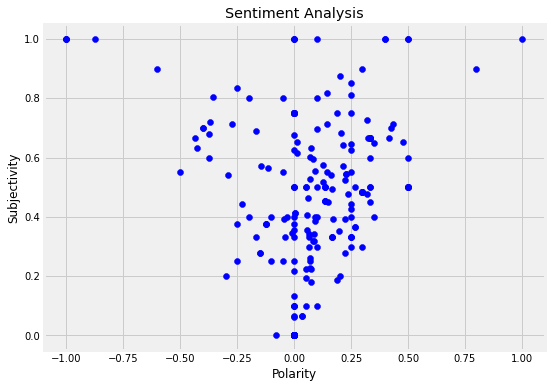

In [ ]:
# Plotting 
plt.figure(figsize=(8,6)) 
for i in range(0, df.shape[0]):
  plt.scatter(df["Polarity"][i], df["Subjectivity"][i], color='Blue') 
# plt.scatter(x,y,color)   
plt.title('Sentiment Analysis') 
plt.xlabel('Polarity') 
plt.ylabel('Subjectivity') 
plt.show()

**Print the percentage of positive tweets. About 81/100 of the tweets are considered positive tweets**

In [ ]:
# Print the percentage of positive tweets
ptweets = df[df.Analysis == 'Positive']
ptweets = ptweets['Text']
ptweets

round( (ptweets.shape[0] / df.shape[0]) * 100 , 1)

25.5

**Print the percentage of negative tweets. About 9/100 tweets are considered negative tweets**

In [ ]:
# Print the percentage of negative tweets
ntweets = df[df.Analysis == 'Negative']
ntweets = ntweets['Text']
ntweets

round( (ntweets.shape[0] / df.shape[0]) * 100, 1)

8.4

**Show the value counts. Now we can see 81 tweets are positive, 10 are neutral, and 9 are negative**

In [ ]:
# Show the value counts
df['Analysis'].value_counts()

Neutral     331
Positive    128
Negative     42
Name: Analysis, dtype: int64

**Visually show the value counts**

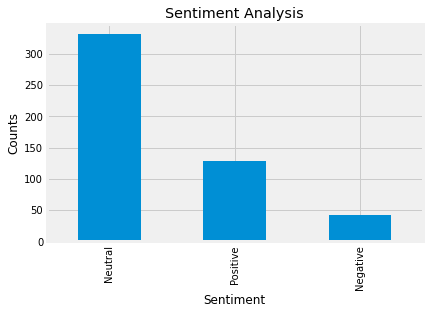

In [ ]:
# Plotting and visualizing the counts
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind = 'bar')
plt.show()